<a href="https://colab.research.google.com/github/Raniac0des/Data-Science-Workshop/blob/main/Notebook_for_HW4_CS218.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/Chicago Health Atlas Data (1).csv")

# Display the first 5 rows
print("First 5 rows of the dataset:")
display(df.head().to_markdown(index=False, numalign="left", stralign="left"))

# Display column names
print("\nColumn names:")
display(df.columns.to_list())

# Display descriptive statistics
print("\nDescriptive statistics of the dataset:")
display(df.describe().to_markdown(numalign="left", stralign="left"))

First 5 rows of the dataset:


'| Layer          | Name               | GEOID   | Population   | Longitude   | Latitude   | SVI     | ViolentCrime   | Robbery   | Pop_2019_2023   | InfantMortality   | CrowdedHousing   | TreeCanopy   | LowFoodAccess   | GradRate   | Unemployment   | PerCapitaIncome   | PovertyRate   | TeenBirthRate   | BirthRate   | IndLivingDiff   |\n|:---------------|:-------------------|:--------|:-------------|:------------|:-----------|:--------|:---------------|:----------|:----------------|:------------------|:-----------------|:-------------|:----------------|:-----------|:---------------|:------------------|:--------------|:----------------|:------------|:----------------|\n| Community area | Austin             | 25      | 96753        | -87.7631    | 41.8941    | 88.2699 | 1860.06        | 642.611   | 99100.1         | 9.57786           | 4.47205          | 19           | 32.4076         | 81.7308    | 14.6236        | 25795.7           | 24.7465       | 29.0466         | 21.8129     | 5.95


Column names:


['Layer',
 'Name',
 'GEOID',
 'Population',
 'Longitude',
 'Latitude',
 'SVI',
 'ViolentCrime',
 'Robbery',
 'Pop_2019_2023',
 'InfantMortality',
 'CrowdedHousing',
 'TreeCanopy',
 'LowFoodAccess',
 'GradRate',
 'Unemployment',
 'PerCapitaIncome',
 'PovertyRate',
 'TeenBirthRate',
 'BirthRate',
 'IndLivingDiff']


Descriptive statistics of the dataset:


'|       | GEOID   | Population   | Longitude   | Latitude   | SVI     | ViolentCrime   | Robbery   | Pop_2019_2023   | InfantMortality   | CrowdedHousing   | TreeCanopy   | LowFoodAccess   | GradRate   | Unemployment   | PerCapitaIncome   | PovertyRate   | TeenBirthRate   | BirthRate   | IndLivingDiff   |\n|:------|:--------|:-------------|:------------|:-----------|:--------|:---------------|:----------|:----------------|:------------------|:-----------------|:-------------|:----------------|:-----------|:---------------|:------------------|:--------------|:----------------|:------------|:----------------|\n| count | 77      | 77           | 77          | 77         | 77      | 77             | 77        | 77              | 77                | 77               | 76           | 77              | 77         | 77             | 77                | 77            | 77              | 77          | 77              |\n| mean  | 39      | 35570.9      | -87.6752    | 41.8395    | 65.0063 | 336

The code above is for part 1, "load and peak the data".

CrowdedHousing Mean: 3.51980825974026
TeenBirthRate Mean:  14.915242592207795
CrowdedHousing Median: 2.9695148
TeenBirthRate Median:  12.466085


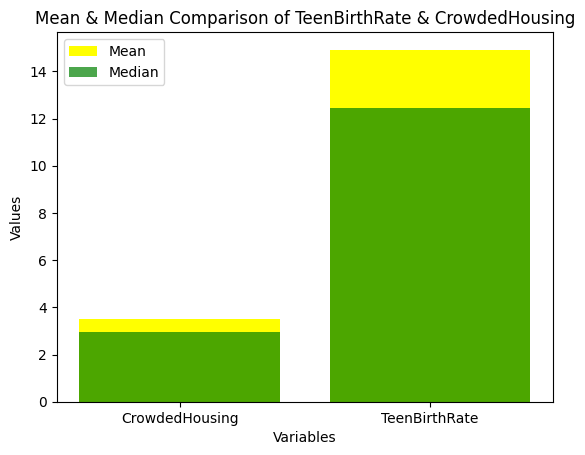

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics

#loading the dataset in the cell
df = pd.read_csv("/content/Chicago Health Atlas Data (1).csv")

#finding the mean of both chosen variables
mean_crowdedhousing = df['CrowdedHousing'].mean()
mean_teenbirthrate = df['TeenBirthRate'].mean()

#finding the median for both chosen variables
median_crowdedhousing = df['CrowdedHousing'].median()
median_teenbirthrate = df['TeenBirthRate'].median()

#printing all the values
print("CrowdedHousing Mean:", mean_crowdedhousing)
print("TeenBirthRate Mean: ", mean_teenbirthrate)
print("CrowdedHousing Median:", median_crowdedhousing)
print("TeenBirthRate Median: ", median_teenbirthrate)

#creating the bar chart
categories = ['CrowdedHousing', 'TeenBirthRate']
means = [mean_crowdedhousing, mean_teenbirthrate]
medians = [median_crowdedhousing, median_teenbirthrate]

plt.bar(categories, means, label='Mean', color='yellow')
plt.bar(categories, medians, label='Median', color='green', alpha=0.7)
plt.xlabel('Variables')
plt.ylabel('Values')
plt.title('Mean & Median Comparison of TeenBirthRate & CrowdedHousing')
plt.legend()
plt.show()

The code above is for part 2, creating columns. I chose another variable "TeenBirthRate" and compared it to "CrowdedHousing", to see if there was a positive or negative correlation.

-------


Based on the bar chart above, the median for the TeenBirthRate variable is higher than the median for the CrowdedHousing variable. This indicates that teen birth rates are a higher concern than crowded housing, so they don't have a strong correlation. Since the means for both variables are higher than the median, this can mean that a small number of neighborhoods with higher values are raising the overall average. Most neighborhoods fall closer to the median, but the few higher numbers shift the mean upward.

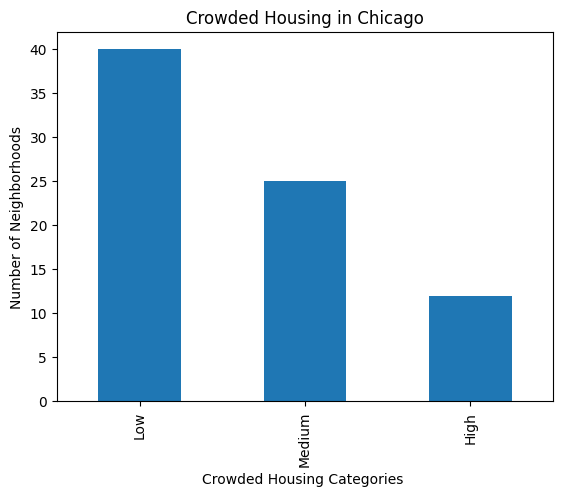

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


#loading the dataset
df = pd.read_csv("/content/Chicago Health Atlas Data (1).csv")

#creating a new column that classifies crowded housing into low/medium/high
df['CrowdedHousing'] = pd.cut(df['CrowdedHousing'], bins=[0, 3, 6, 11], labels=['Low', 'Medium', 'High'])
df['CrowdedHousing'].value_counts().plot(kind= "bar"), plt.title("Crowded Housing in Chicago")
plt.xlabel("Crowded Housing Categories "), plt.ylabel("Number of Neighborhoods")
plt.show()

This is for part 3, creating a bar chart. I created a code to count of neighborhoods in each catoegory, and where they fit regarding the CrowdedHousing category (high, medium, or low).

-------

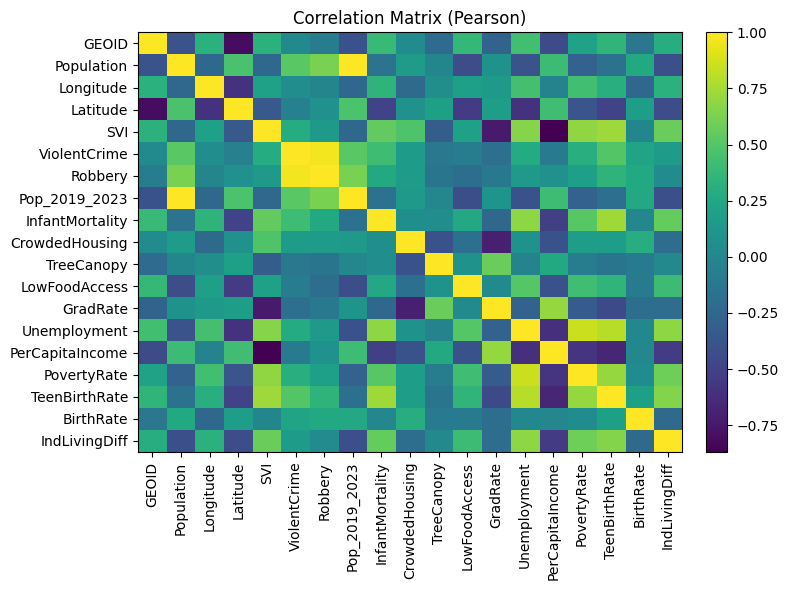

Strongest positive with CrowdedHousing: SVI 0.487
Strongest negative with CrowdedHousing: GradRate -0.707


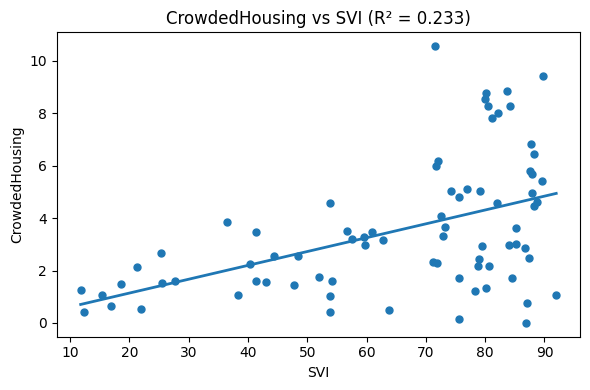

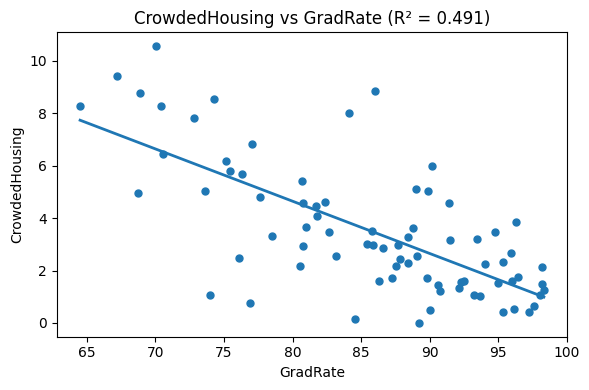

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- 1) Load & make correlation heatmap for numeric columns ---
df = pd.read_csv("/content/Chicago Health Atlas Data (1).csv")

num = df.select_dtypes(include=["number"]).dropna()   # numeric-only, drop NaNs for corr
corr = num.corr(method="pearson")

plt.figure(figsize=(8,6))
im = plt.imshow(corr, aspect="auto")
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Matrix (Pearson)")
plt.tight_layout()
plt.show()

# --- 2) Identify strongest + and − with CrowdedHousing ---
target = "CrowdedHousing"
row = corr[target].drop(labels=[target])   # exclude self-correlation
pos_var = row.idxmax()                     # strongest positive
neg_var = row.idxmin()                     # strongest negative
print("Strongest positive with CrowdedHousing:", pos_var, round(row[pos_var], 3))
print("Strongest negative with CrowdedHousing:", neg_var, round(row[neg_var], 3))

# --- 3) Two scatterplots with trend line and R^2 ---
def scatter_with_trend(xname, yname=target):
  sub = df[[xname, yname]].dropna()
  x = sub[xname].values
  y = sub[yname].values

  # fit line y = a*x + b
  a, b = np.polyfit(x, y, 1)
  # R^2 via Pearson r
  r = np.corrcoef(x, y)[0, 1]
  r2 = r**2

  plt.figure(figsize=(6,4))
  plt.scatter(x, y, s=25)
  xs = np.linspace(x.min(), x.max(), 200)
  plt.plot(xs, a*xs + b, linewidth=2)
  plt.title(f"{yname} vs {xname} (R² = {r2:.3f})")
  plt.xlabel(xname)
  plt.ylabel(yname)
  plt.tight_layout()
  plt.show()

# plot the required two charts
scatter_with_trend(pos_var, target)  # strongest positive
scatter_with_trend(neg_var, target)  # strongest negative


The code above is for part 4, creating a correlation matrix. The purpose of this is to compare all numeric variables in the dataset and highlight which ones have the strongest positive or negative relationships with crowded housing.

--------

***Based on the analysis ( Analysis made by Gemini):***



1.  **Correlation with Graduation Rate:** The scatterplot shows a strong negative correlation between "CrowdedHousing" and "GradRate" (R² = 0.491). This suggests that neighborhoods with higher graduation rates tend to have less crowded housing. This strong inverse relationship indicates that education level or factors associated with higher graduation rates may play a role in housing conditions.

2.  **Correlation with SVI:** The scatterplot shows a positive correlation between "CrowdedHousing" and "SVI" (Social Vulnerability Index) (R² = 0.233). This suggests that areas with higher social vulnerability tend to have more crowded housing.

3.  **Crowded Housing Distribution:** The bar chart shows that a significant number of neighborhoods fall into the "Low" and "Medium" categories for crowded housing, but there is still a portion in the "High" category.

**Argument for Intervention:**

Given the strong negative correlation between crowded housing and graduation rates, an intervention focused on improving educational outcomes in vulnerable neighborhoods could potentially lead to a decrease in crowded housing. This could involve:

*   **Investing in schools in high-SVI areas:** Providing more resources, better facilities, and support programs in schools located in socially vulnerable neighborhoods could help improve graduation rates.
*   **Offering educational support for families:** Programs that provide tutoring, after-school help, and resources for parents to support their children's education could also contribute to higher graduation rates.
*   **Connecting education with housing resources:** Exploring partnerships between educational institutions and housing assistance programs could help families in vulnerable areas access better housing options as educational attainment increases.

While the correlation with SVI is weaker, addressing social vulnerability more broadly through community development programs, job training, and access to healthcare could also indirectly impact crowded housing by improving overall living conditions and economic stability.

Focusing on improving graduation rates appears to be a promising avenue for intervention, given the strong observed relationship with crowded housing. This approach addresses a contributing factor that is negatively correlated with crowded housing, suggesting that improvements in education could have a positive ripple effect on housing conditions.

--------

Analysis made by Chatgpt:

The data shows that neighborhoods with higher social vulnerability (SVI), such as West Garfield Park and South Lawndale, also face higher levels of crowded housing. In contrast, areas with stronger graduation rates, like Lincoln Park and Edison Park, tend to have lower crowding. This suggests that overcrowding is tied not only to housing costs but also to education and broader structural disadvantages. An effective intervention would combine short-term housing support in high-SVI neighborhoods with long-term investment in education and community programs to strengthen graduation rates and economic stability. Collecting additional data on rent burden, household size, and housing availability would further clarify the drivers of overcrowding and inform targeted solutions.

--------

**Final Reflection: **


1. Give one example from this assignment where you used Gemini to get from not‑working to working code?  What did you do to solve the problem?
    

    *    I had issues getting my code to work when making a correlation matrix. I had Gemini help resolve minor issues I had, such as getting the positive and negative correlation to work. I asked questions to better understand that part of the homework assignment.


2. What was the thing you struggled with the most?
  

    *   The correlation Matrix.

3. What was the thing that was surpisingly easy?
    
   *   I didn't have to use Gemini to write the code for loading the dataset,  creating the different columns needed, and creating the scatterplots to compare different variables.


4. Gemini vs. ChatGPT - based on what you know so far, when is it good to use Gemini

    *   I believe using Gemini is useful when you face an error you can't resovle after trying different solutions. In addition, it can help when you're learning code and need a quick explanation.